[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Johnsoneer/Climate-Change-Natural-Disasters/blob/main/Climate_Change_and_Economic_Impact.ipynb#scrollTo=K-TSjJS69L_F)


# <center>Climate Change and Economics</center>
#### <center>What is the relationships between the number of natural disasters and the cost?</center>

### Developers
- Will Johnson(hmd9tv)
- Haley Egan (vkb6bn)
- Diana Morris (dmd8a)
- Maggie Houck (meh7z8)

# Summary

This script leverages code written in our github repository, found here: https://github.com/HaleyEgan/Climate-Change-Natural-Disasters

This is designed to showcase the functionality of our code as well as the decisions we made along the way. For more information, you can view our slides for our presentation here: https://docs.google.com/presentation/d/1pAONeXvcRjInLijvmbONoVy9zX_O9UT6/edit#slide=id.p8 

# Part 1: Load our GitHub Repository

In [1]:
from google.colab import drive
import seaborn as sns
import unittest
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive
! git clone https://github.com/HaleyEgan/Climate-Change-Natural-Disasters.git

/content/drive/MyDrive
fatal: destination path 'Climate-Change-Natural-Disasters' already exists and is not an empty directory.


In [3]:
!cp Climate-Change-Natural-Disasters/Code/NaturalDisastersDataCleaner.py .
!cp Climate-Change-Natural-Disasters/Code/Project_unittests.py .
!cp Climate-Change-Natural-Disasters/Data/natural_disasters_original.csv .
!cp Climate-Change-Natural-Disasters/Data/natural_disaster_economic_impact_original.csv .

In [4]:
from NaturalDisastersDataCleaner import DisasterData
%matplotlib inline

# Part 2: Run our unittests

In [5]:
# this will help ensure the subsequent code blocks will run properly. 
from Project_unittests import *
unittest.main(argv=[''], verbosity=1, exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.142s

OK


# Part 3: Load and Clean our Dataset





In [6]:
obj = DisasterData(csv_strs = ['natural_disasters_original.csv',
                               'natural_disaster_economic_impact_original.csv'])

In [7]:
# Display our dataframe's top
obj.disaster_df.head()

,Entity,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2


We noticed that the dataset appears to repeat years in for each disaster type. We also noticed that there were several missing values when we group by the year so we needed to clean those out.

Now let's look at the top of our economic column. 

In [8]:
obj.economic_df.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


Similar story. Let's clean this dataset so that we have one row per year, we have only the columns we care about, and we have ingore the years before 1970 and after 2015.

In [9]:
# Clean dataset and collect into one dataframe
obj.cleanDf()
obj.df.head()

,All natural disasters,Drought,Extreme temperature,Extreme weather,Flood,Landslide,Wildfire,TotalCost: All natural disasters,TotalCost: Drought,TotalCost: Extreme temperature,TotalCost: Extreme weather,TotalCost: Flood,TotalCost: Landslide,TotalCost: Wildfire
Year,,,,,,,,,,,,,,
1970,77.0,2.0,NaN,24.0,31.0,5.0,3.0,3.076594e+09,2100000.0,NaN,1.064974e+09,1.307770e+09,NaN,100000000.0
1971,61.0,7.0,1.0,22.0,15.0,5.0,2.0,1.688589e+09,3900000.0,100000000.0,2.083890e+08,5.563000e+08,NaN,NaN
1972,63.0,7.0,2.0,26.0,15.0,5.0,3.0,4.090413e+09,187000000.0,NaN,2.602920e+09,4.344930e+08,NaN,NaN
1973,60.0,2.0,3.0,22.0,20.0,5.0,3.0,2.407043e+09,76000000.0,NaN,5.392000e+08,1.766493e+09,NaN,NaN
1974,68.0,4.0,NaN,28.0,19.0,10.0,3.0,4.064944e+09,NaN,NaN,3.123017e+09,9.069720e+08,21700000.0,NaN


# Part 4: Vizualize and Analyze 

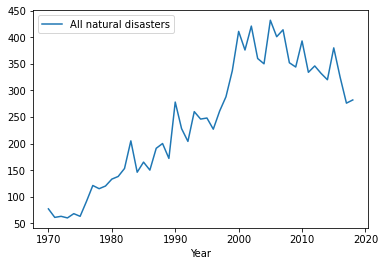

In [10]:
#time series of all weather
obj.df = obj.df.reset_index()
allDisasters = obj.df.plot(x="Year", y="All natural disasters")
allDisasters

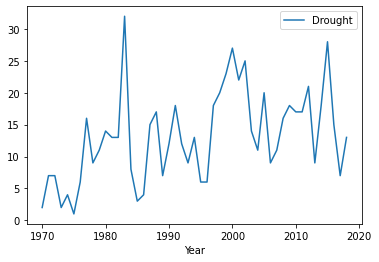

In [11]:
drought = obj.df.plot(x="Year", y="Drought")
drought

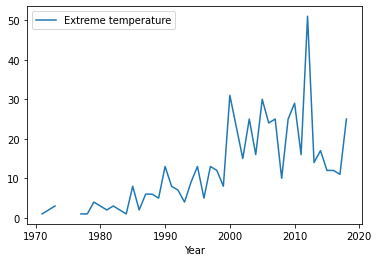

In [12]:
extremeT = obj.df.plot(x="Year", y="Extreme temperature")
extremeT

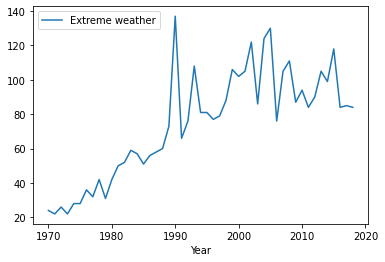

In [13]:
extremeW = obj.df.plot(x="Year", y="Extreme weather")
extremeW

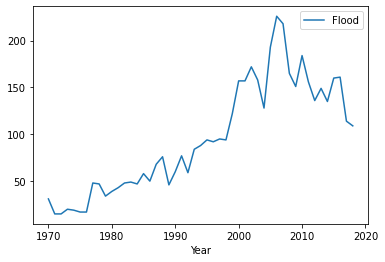

In [14]:
flood = obj.df.plot(x="Year", y="Flood")
flood

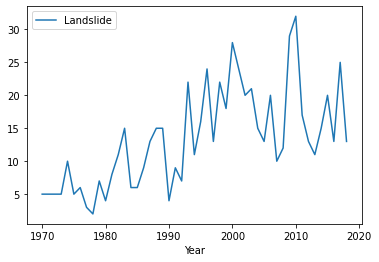

In [15]:
landslide = obj.df.plot(x="Year", y="Landslide")
landslide

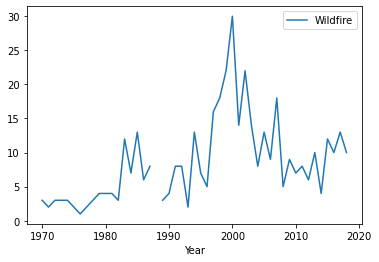

In [16]:
wildfire = obj.df.plot(x="Year", y="Wildfire")
wildfire

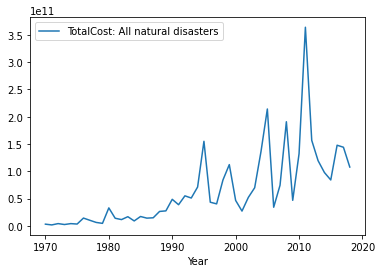

In [17]:
#time series of costs of weather
allDisastersCost = obj.df.plot(x="Year", y="TotalCost: All natural disasters")
allDisastersCost

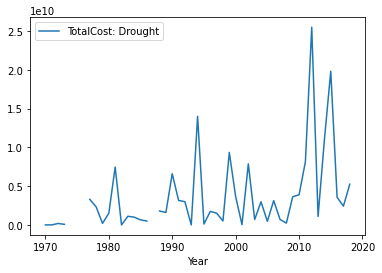

In [18]:
droughtCost = obj.df.plot(x="Year", y="TotalCost: Drought")
droughtCost

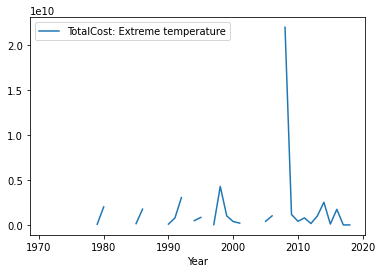

In [19]:
extremeTCost = obj.df.plot(x="Year", y="TotalCost: Extreme temperature")
extremeTCost

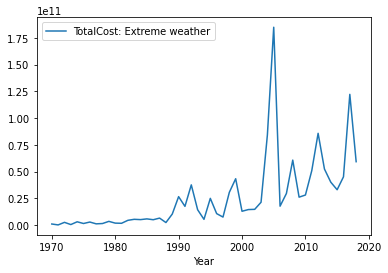

In [20]:
extremeWCost = obj.df.plot(x="Year", y="TotalCost: Extreme weather")
extremeWCost

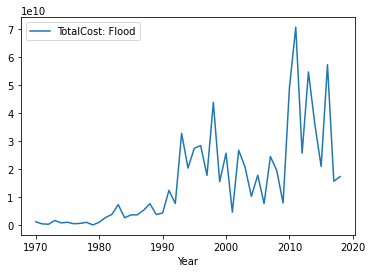

In [21]:
floodCost = obj.df.plot(x="Year", y="TotalCost: Flood")
floodCost

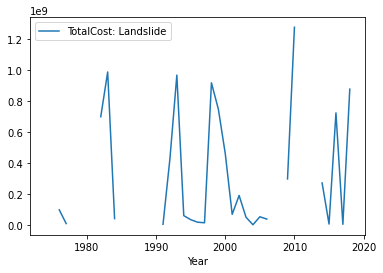

In [22]:
landslideCost = obj.df.plot(x="Year", y="TotalCost: Landslide")
landslideCost

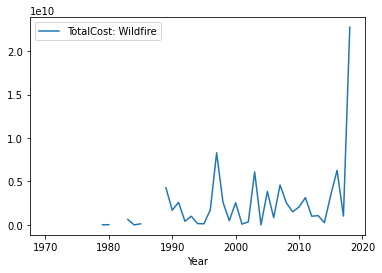

In [23]:
wildfireCost = obj.df.plot(x="Year", y="TotalCost: Wildfire")
wildfireCost

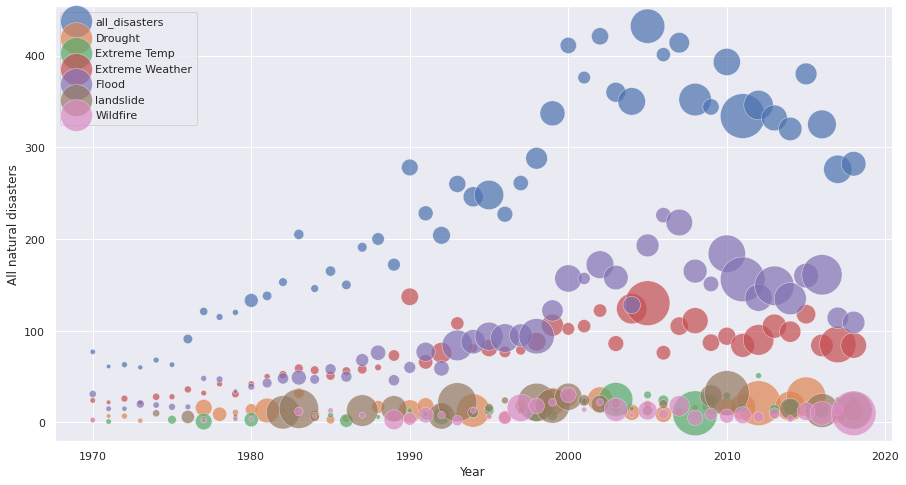

In [24]:

# Plot the total number of events and their cost (by size) on one chart. 

sns.set(rc = {'figure.figsize':(15,8)})
allDisastersandCost = sns.scatterplot(data=obj.df, alpha=.7, x="Year",y="All natural disasters", size="TotalCost: All natural disasters", legend=False, sizes=(20, 2000))
droughtandCost = sns.scatterplot(data=obj.df, alpha=.7, x="Year",y="Drought", size="TotalCost: Drought", legend=False, sizes=(20, 2000))
extremeTandCost = sns.scatterplot(data=obj.df, alpha=.7, x="Year",y="Extreme temperature", size="TotalCost: Extreme temperature", legend=False, sizes=(20, 2000))
extremeWandCost = sns.scatterplot(data=obj.df, alpha=.7, x="Year",y="Extreme weather", size="TotalCost: Extreme weather", legend=False, sizes=(20, 2000))
floodandCost = sns.scatterplot(data=obj.df, alpha=.7, x="Year",y="Flood", size="TotalCost: Flood", legend=False, sizes=(20, 2000))
landslideandCost = sns.scatterplot(data=obj.df, alpha=.7, x="Year",y="Landslide", size="TotalCost: Landslide", legend=False, sizes=(20, 2000))
wildFireandCost = sns.scatterplot(data=obj.df, alpha=.7, x="Year",y="Wildfire", size="TotalCost: Wildfire", legend=False, sizes=(20, 2000))

plt.legend(labels=["all_disasters",
                   "Drought",
                   'Extreme Temp',
                   "Extreme Weather",
                   "Flood",
                   "landslide",
                   "Wildfire"])
